In [329]:
import csv
import sys
import pandas as pd
import numpy as np
import pylab
import datetime
from matplotlib import pyplot as plt
import matplotlib.dates

In [330]:
df_1 = pd.read_csv('data/user1/user1.csv')

df_2 = pd.read_csv('data/user2/user2.csv')

df_3 = pd.read_csv('data/user3/user3.csv')

In [331]:
#Adjusting dates
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1['Week_Number'] = df_1['Date'].dt.week
df_1['Month_Number'] = df_1['Date'].dt.month
df_1['Year'] = df_1['Date'].dt.year

df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2['Week_Number'] = df_2['Date'].dt.week
df_2['Month_Number'] = df_2['Date'].dt.month
df_2['Year'] = df_2['Date'].dt.year

df_3['Date'] = pd.to_datetime(df_3['Date'])
df_3['Week_Number'] = df_3['Date'].dt.week
df_3['Month_Number'] = df_3['Date'].dt.month
df_3['Year'] = df_3['Date'].dt.year

In [332]:
df_1.head()

,Date,app_opens,swipes_likes,swipes_passes,matches,messages_sent,messages_received,total_swipes,gender,attracted_to,Week_Number,Month_Number,Year
0,2020-04-04,93,189,177,4,9,5,366,M,F,14,4,2020
1,2020-04-05,109,92,52,9,23,16,144,M,F,14,4,2020
2,2020-04-06,75,107,57,7,22,20,164,M,F,15,4,2020
3,2020-04-07,104,201,118,3,50,38,319,M,F,15,4,2020
4,2020-04-08,40,172,154,8,5,3,326,M,F,15,4,2020


# Simple visual exploration

## User 1

Text(0.5, 1.0, 'Daily matches')

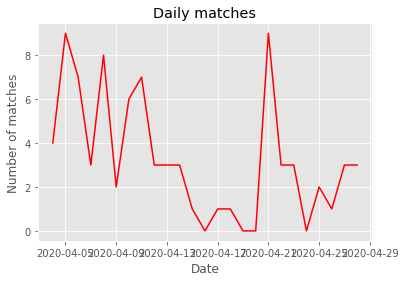

In [333]:
plt.style.use('ggplot')

#Daily matches
plt.plot(df_1['Date'],df_1['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Daily matches')

Text(0.5, 1.0, 'Daily right swipes')

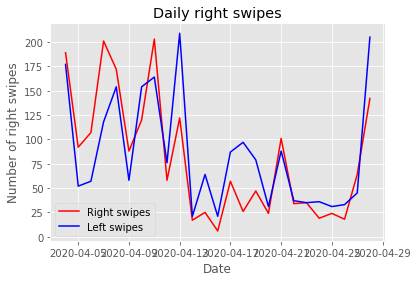

In [334]:
plt.plot(df_1['Date'],df_1['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_1['Date'],df_1['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_1['Date'],df_1['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Daily right swipes')

Text(0.5, 1.0, 'Daily app opens')

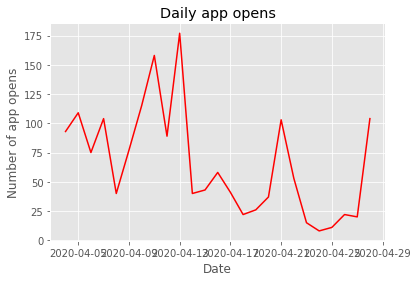

In [335]:
plt.plot(df_1['Date'],df_1['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Daily app opens')

Text(0.5, 1.0, 'Daily messages')

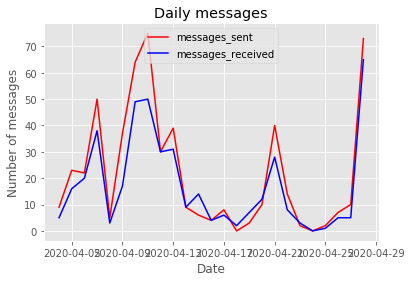

In [336]:
plt.plot(df_1['Date'],df_1['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_1['Date'],df_1['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Daily messages')

## User 2

### ----- User 2 Daily -----


Text(0.5, 1.0, 'Daily matches')

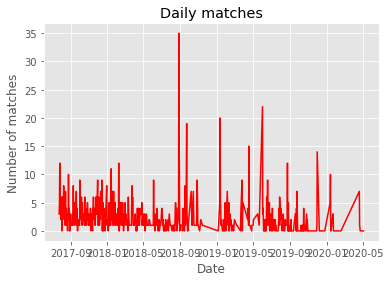

In [337]:
#Daily matches
plt.plot(df_2['Date'],df_2['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Daily matches')

Text(0.5, 1.0, 'Daily right swipes')

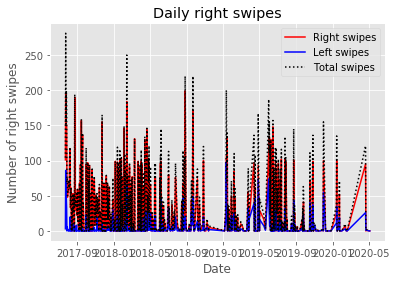

In [338]:
plt.plot(df_2['Date'],df_2['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_2['Date'],df_2['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
plt.plot(df_2['Date'],df_2['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Daily right swipes')

Text(0.5, 1.0, 'Daily app opens')

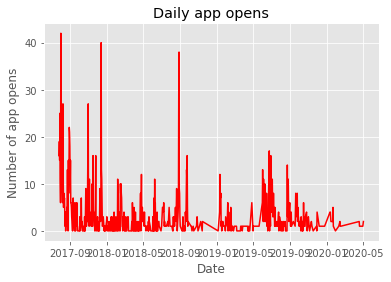

In [339]:
plt.plot(df_2['Date'],df_2['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Daily app opens')

Text(0.5, 1.0, 'Daily messages')

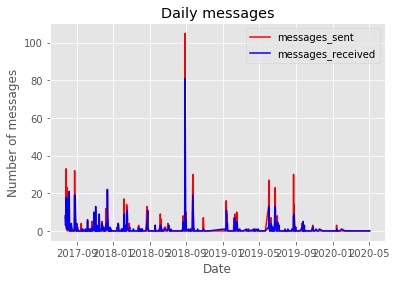

In [340]:
plt.plot(df_2['Date'],df_2['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_2['Date'],df_2['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Daily messages')

### ----- User 2 Weekly -----

In [341]:
df_2_weekly = df_2.groupby(['Year','Week_Number']).agg({
    'Date':'first',
    'app_opens': 'sum',
    'swipes_likes': 'sum',
    'swipes_passes': 'sum',
    'matches': 'sum',
    'messages_sent': 'sum',
    'messages_received': 'sum',
    'total_swipes': 'sum',
    'gender': 'first',
    'attracted_to': 'first'
})

In [342]:
df_2_weekly.head()

Date  app_opens  swipes_likes  swipes_passes  matches  \
Year Week_Number                                                               
2017 30          2017-07-25         92           767            218       33   
     31          2017-07-31        120           417             13       25   
     32          2017-08-07         68           509             25       33   
     33          2017-08-14         14           147              3       19   
     34          2017-08-21         53           333             22       22   

                  messages_sent  messages_received  total_swipes gender  \
Year Week_Number                                                          
2017 30                      53                 41           985      M   
     31                      43                 40           430      M   
     32                      19                 25           534      M   
     33                       4                  7           150      M   
     34                      55                 44           355      M   

                 attracted_to  
Year Week_Number               
2017 30                     F  
     31                     F  
     32                     F  
     33                     F  
     34                     F

Text(0.5, 1.0, 'Weekly matches')

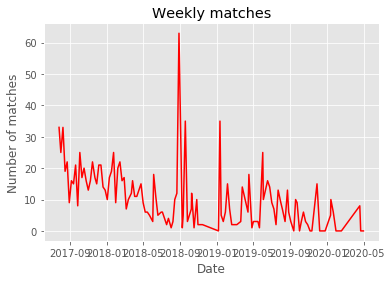

In [343]:
#Weekly matches
plt.plot(df_2_weekly['Date'],df_2_weekly['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Weekly matches')

Text(0.5, 1.0, 'Weekly right swipes')

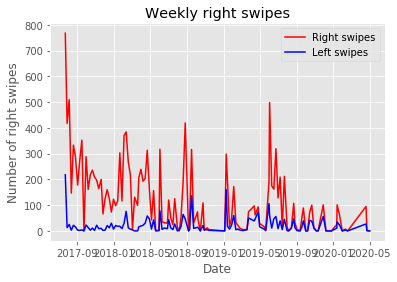

In [344]:
plt.plot(df_2_weekly['Date'],df_2_weekly['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_2_weekly['Date'],df_2_weekly['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_2_weekly['Date'],df_2_weekly['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Weekly right swipes')

Text(0.5, 1.0, 'Weekly app opens')

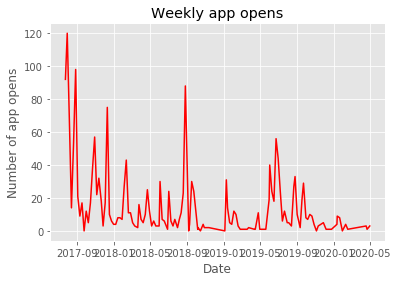

In [345]:
plt.plot(df_2_weekly['Date'],df_2_weekly['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Weekly app opens')

Text(0.5, 1.0, 'Weekly messages')

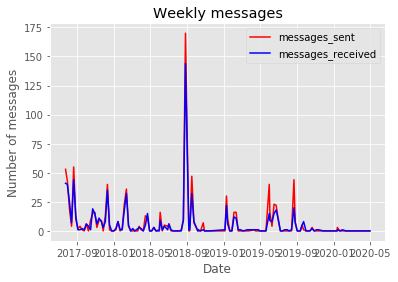

In [346]:
plt.plot(df_2_weekly['Date'],df_2_weekly['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_2_weekly['Date'],df_2_weekly['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Weekly messages')

### ----- User 2 Monthly -----

In [347]:
df_2_monthly = df_2.groupby(['Year','Month_Number']).agg({
    'Date':'first',
    'app_opens': 'sum',
    'swipes_likes': 'sum',
    'swipes_passes': 'sum',
    'matches': 'sum',
    'messages_sent': 'sum',
    'messages_received': 'sum',
    'total_swipes': 'sum',
    'gender': 'first',
    'attracted_to': 'first'
})

Text(0.5, 1.0, 'Monthly matches')

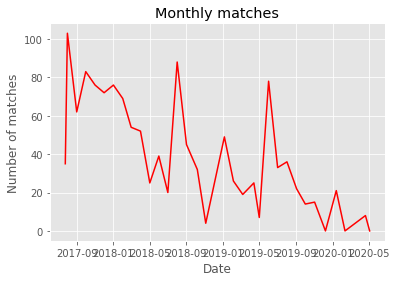

In [348]:
#Monthly matches
plt.plot(df_2_monthly['Date'],df_2_monthly['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Monthly matches')

Text(0.5, 1.0, 'Monthly right swipes')

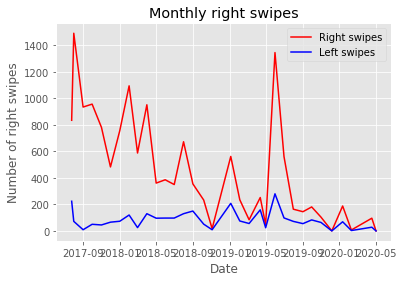

In [349]:
plt.plot(df_2_monthly['Date'],df_2_monthly['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_2_monthly['Date'],df_2_monthly['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_2_weekly['Date'],df_2_weekly['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Monthly right swipes')

Text(0.5, 1.0, 'Monthly app opens')

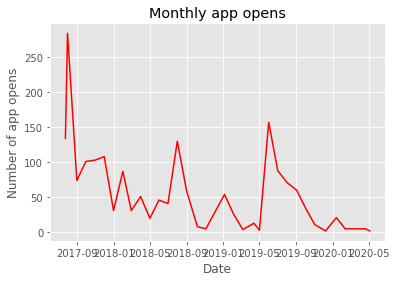

In [350]:
plt.plot(df_2_monthly['Date'],df_2_monthly['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Monthly app opens')

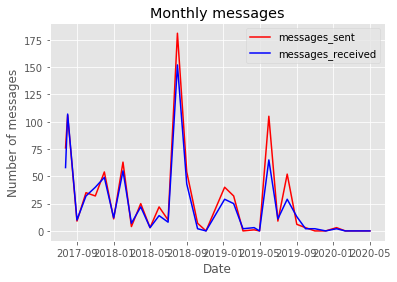

In [351]:
def monthly_messages():
    plt.plot(df_2_monthly['Date'],df_2_monthly['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
    plt.plot(df_2_monthly['Date'],df_2_monthly['messages_received'], color = 'b', label = 'messages_received') #messages_received
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Number of messages')
    plt.title('Monthly messages')

monthly_messages()

# User 3

Text(0.5, 1.0, 'Daily matches')

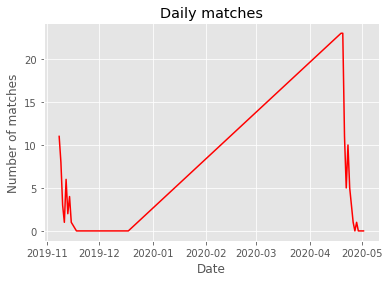

In [352]:
#Daily matches
plt.plot(df_3['Date'],df_3['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Daily matches')

Text(0.5, 1.0, 'Daily right swipes')

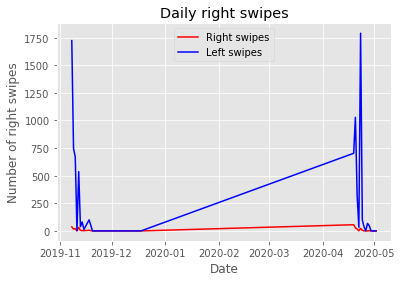

In [353]:
plt.plot(df_3['Date'],df_3['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_3['Date'],df_3['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_1['Date'],df_1['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Daily right swipes')

Text(0.5, 1.0, 'Daily app opens')

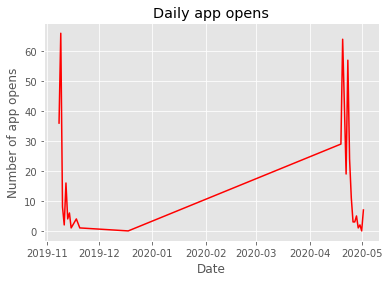

In [354]:
plt.plot(df_3['Date'],df_3['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Daily app opens')

Text(0.5, 1.0, 'Daily messages')

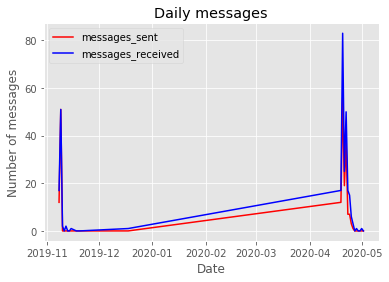

In [355]:
plt.plot(df_3['Date'],df_3['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_3['Date'],df_3['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Daily messages')

### ----- User 3 Weekly -----

In [356]:
df_3_weekly = df_3.groupby(['Year','Week_Number']).agg({
    'Date':'first',
    'app_opens': 'sum',
    'swipes_likes': 'sum',
    'swipes_passes': 'sum',
    'matches': 'sum',
    'messages_sent': 'sum',
    'messages_received': 'sum',
    'total_swipes': 'sum',
    'gender': 'first',
    'attracted_to': 'first'
})

In [357]:
df_3_weekly.head(15)

Date  app_opens  swipes_likes  swipes_passes  matches  \
Year Week_Number                                                               
2019 45          2019-11-08        110            75           3139       22   
     46          2019-11-11         29            41            672       14   
     47          2019-11-18          5             6            100        0   
     51          2019-12-18          0             0              0        0   
2020 16          2020-04-19         29            56            703       23   
     17          2020-04-20        220            75           3310       58   
     18          2020-04-27         18             2            117        1   

                  messages_sent  messages_received  total_swipes gender  \
Year Week_Number                                                          
2019 45                      63                 70          3214      F   
     46                       0                  3           713      F   
     47                       0                  0           106      F   
     51                       0                  1             0      F   
2020 16                      12                 17           759      F   
     17                     130                199          3385      F   
     18                       0                  2           119      F   

                 attracted_to  
Year Week_Number               
2019 45                     M  
     46                     M  
     47                     M  
     51                     M  
2020 16                     M  
     17                     M  
     18                     M

Text(0.5, 1.0, 'Weekly matches')

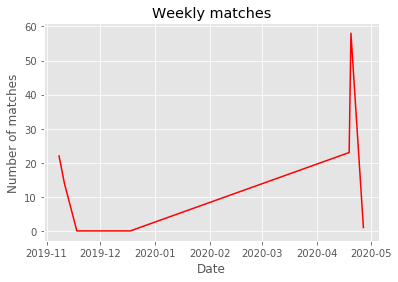

In [358]:
#Weekly matches
plt.plot(df_3_weekly['Date'],df_3_weekly['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Weekly matches')

Text(0.5, 1.0, 'Weekly right swipes')

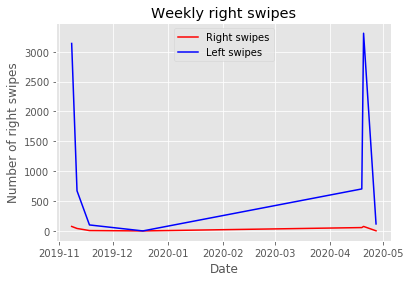

In [359]:
plt.plot(df_3_weekly['Date'],df_3_weekly['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_3_weekly['Date'],df_3_weekly['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_1['Date'],df_1['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Weekly right swipes')

Text(0.5, 1.0, 'Weekly app opens')

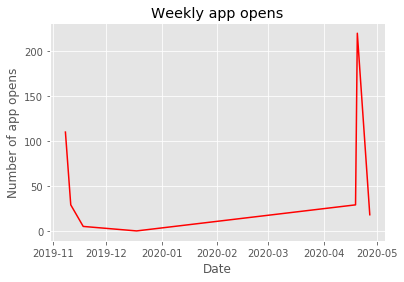

In [360]:
plt.plot(df_3_weekly['Date'],df_3_weekly['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Weekly app opens')

Text(0.5, 1.0, 'Weekly messages')

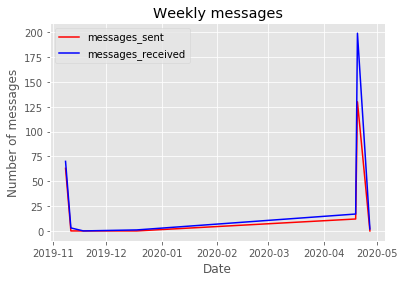

In [361]:
plt.plot(df_3_weekly['Date'],df_3_weekly['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_3_weekly['Date'],df_3_weekly['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Weekly messages')

### ----- User 3 Monthly -----

In [362]:
df_3_monthly = df_3.groupby(['Year','Month_Number']).agg({
    'Date':'first',
    'app_opens': 'sum',
    'swipes_likes': 'sum',
    'swipes_passes': 'sum',
    'matches': 'sum',
    'messages_sent': 'sum',
    'messages_received': 'sum',
    'total_swipes': 'sum',
    'gender': 'first',
    'attracted_to': 'first'
})

Text(0.5, 1.0, 'Monthly matches')

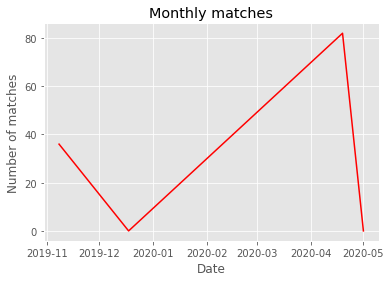

In [363]:
#Monthly matches
plt.plot(df_3_monthly['Date'],df_3_monthly['matches'], color = 'r') 
plt.xlabel('Date')
plt.ylabel('Number of matches')
plt.title('Monthly matches')

Text(0.5, 1.0, 'Monthly right swipes')

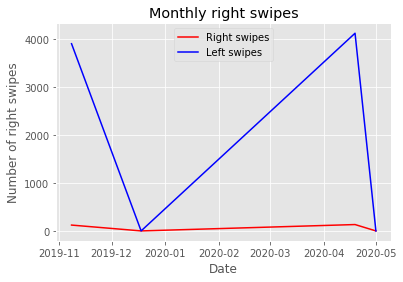

In [364]:
plt.plot(df_3_monthly['Date'],df_3_monthly['swipes_likes'], color = 'r', label= 'Right swipes') #Right swipes
plt.plot(df_3_monthly['Date'],df_3_monthly['swipes_passes'], color = 'b', label = 'Left swipes') #Left swipes
#plt.plot(df_1['Date'],df_1['total_swipes'], color = 'k', label = 'Total swipes', linestyle = ':') #Total swipes
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of right swipes')
plt.title('Monthly right swipes')

Text(0.5, 1.0, 'Monthly app opens')

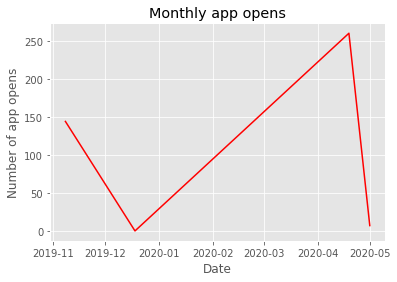

In [365]:
plt.plot(df_3_monthly['Date'],df_3_monthly['app_opens'], color = 'r') #App opens
plt.xlabel('Date')
plt.ylabel('Number of app opens')
plt.title('Monthly app opens')

Text(0.5, 1.0, 'Monthly messages')

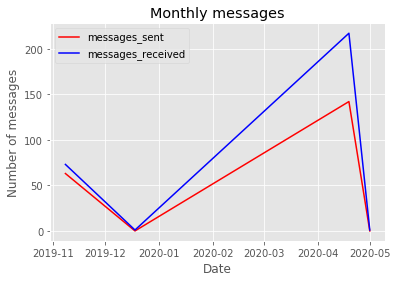

In [366]:
plt.plot(df_3_monthly['Date'],df_3_monthly['messages_sent'], color = 'r', label= 'messages_sent') #messages_sent
plt.plot(df_3_monthly['Date'],df_3_monthly['messages_received'], color = 'b', label = 'messages_received') #messages_received
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of messages')
plt.title('Monthly messages')